# PAM test

In [1]:
import numpy as np
import scipy as sp
import sys
from sklearn.cluster import KMeans as sKMeans
from sklearn_extra.cluster import KMedoids
from math import atan2, cos, sin, sqrt
import matplotlib.pyplot as plt
from random import sample
import seaborn as sns
import random

%matplotlib inline
%load_ext autoreload

In [2]:
sys.path.append("/home/gmancini/Dropbox/appunti/Clustering/src")
import mdutils
import myclusters
import myvalidation
%autoreload 2

use distance of cities in the U. S. as reference dataset; convert coordinates to distances.

In [3]:
def distance(coord0,coord1,radius=6373.0):
    dlon = coord1[1] - coord0[1]
    dlat = coord1[0] - coord0[0]

    a = sin(dlat / 2)**2 + cos(coord0[0]) * cos(coord1[0]) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = radius * c

#### load data for US cities

In [4]:
import csv
ifile = open("places.txt")
places = csv.reader(ifile)
data = np.empty((300,2))
for i,city in enumerate(places):
    data[i] = city
nplaces = data.shape[0]
data.shape

(300, 2)

In [5]:
#convert to radians
coords = (np.pi/180.)*data

In [6]:
np.min(data[:,1]),np.max(data[:,1]),np.min(coords[:,1]),np.max(coords[:,1])

(33.429424, 43.5093982, 0.5834535158452129, 0.7593822541512942)

#### convert latitude / longitude to kilometric distances

In [7]:
distances = np.zeros((nplaces,nplaces))
for i in range(nplaces-1):
    for j in range(i+1,nplaces):
        distances[i,j] = distance(coords[i],coords[j])
        distances[j,i] = distances[i,j]

## settings

In [8]:
nclusters = 3
niter = 500
metric = 'euclidean'

## PAM

In [9]:
my_estimator = myclusters.PAM(K=nclusters,niter=niter,metric=metric)
cost, medoids = my_estimator.do_clustering(X=data,medbuild=True)
cost, medoids, my_estimator.nstep, my_estimator.nswap

('inertia and medoids b4 swap', 16.954711403088062, [18, 109, 119])


(16.954711403088062, [18, 109, 119], 501, 502)

In [10]:
data[my_estimator.medoids]

array([[ -80.968306 ,   35.283424 ],
       [-112.070655 ,   33.4555253],
       [ -80.528095 ,   43.474541 ]])

In [11]:
my_estimator.clusters

array([109, 109, 109, 109, 119, 119,  18, 109, 109,  18, 109,  18, 119,
       109,  18,  18,  18, 109,  18, 119, 119, 119, 119,  18, 109, 119,
       109, 119, 109, 109, 119,  18, 109, 109, 109,  18, 119, 109, 119,
        18,  18,  18,  18,  18,  18, 119, 109,  18, 109, 109, 119,  18,
       109,  18, 119,  18, 109,  18, 119,  18, 109, 119,  18, 109, 119,
        18,  18, 109, 119,  18, 119, 109,  18, 119, 109, 109, 109,  18,
       119, 109, 109,  18, 109, 119, 109, 109, 119, 109, 119, 109, 119,
       119, 109, 119, 119, 119,  18,  18, 109, 109, 109, 119, 109, 109,
        18,  18, 109, 119, 109, 109, 119,  18, 109, 119, 109, 109, 119,
       109, 119, 119,  18,  18, 109, 119,  18, 119,  18, 119,  18, 119,
        18, 119,  18, 109, 109, 119, 119, 109, 109, 119,  18,  18, 109,
       119,  18,  18,  18, 109,  18,  18, 119,  18,  18, 119, 119, 119,
       119, 119,  18,  18, 119, 109, 119, 109,  18, 119, 119, 119, 119,
       119, 119, 109, 109,  18,  18, 109, 119,  18,  18, 119, 10

In [12]:
myeval = myvalidation.cluster_eval(clusters=my_estimator.clusters,X=data,metric=metric)
myeval(method="CH")

array([4.11623557e+07, 2.57567978e-01])

## test 2

In [13]:
def init_board_gauss(N, k):
    n = float(N)/k
    X = []
    for i in range(k):
        c = (random.uniform(-1,1), random.uniform(-1,1))
        s = random.uniform(0.05,0.15)
        x = []
        while len(x) < n:
            a,b = np.array([np.random.normal(c[0],s),np.random.normal(c[1],s)])
            if abs(a) and abs(b)<1:
                x.append([a,b])
        X.extend(x)
    X = np.array(X)[:N]
    return X

In [14]:
np.random.seed(0)
random.seed(0)
data = init_board_gauss(2500,10)

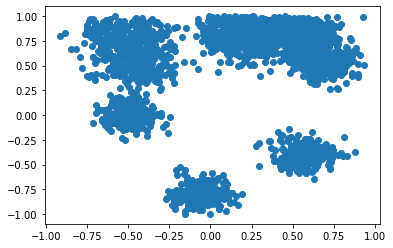

In [15]:
x = data[:,0]
y = data[:,1]
plt.scatter(x,y)

In [ ]:
for k in range(2,15):
    print(k,data)
    my_estimator = myclusters.PAM(K=k,metric=metric)
    my_estimator.do_clustering(X=data,medbuild=True)
    print(my_estimator.nswap,my_estimator.nstep)

2 [[0.85123735 0.55274614]
 [0.77894354 0.72219907]
 [0.86076578 0.42594338]
 ...
 [0.16944407 0.49570615]
 [0.11027146 0.9925048 ]
 [0.31456336 0.9219181 ]]
